- Antes de crear modelos más complejos, en este notebook se pretende crear un modelo base ingenuo que prediga el consumo de un instante t como el de consumo de la muestra anterior, es decir, t-1.  

- Después decompondremos la señal en sus distintas componentes: tendencia, estacionalidad y ruido. Observaremos que tiene una estacionalidad M = 7 días y crearemos un modelo base ingenuo estacional. En este caso, el consumo en el instante t se predecirá como el consumo de t-M.  

- Por último, crearemos una nueva serie temporal sin ruido y volveremos a utilizar los dos modelos anteriores para predecir el consumo de esta nueva serie.  

Referencias importantes de este notebook:  
Galit Shmueli, Kenneth C. Lichtendahl Jr. - 2016 - Practical Time Series Forecasting with R, Página 50  
Rob J Hyndman and George Athanasopoulos - 2018 - Forecasting: Principles and Practice - cap 6.1 - https://otexts.com/fpp2/components.html   
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import supporter
from statsmodels.tsa.seasonal import seasonal_decompose

# Leemos los datos

(0.0, 1000.0)

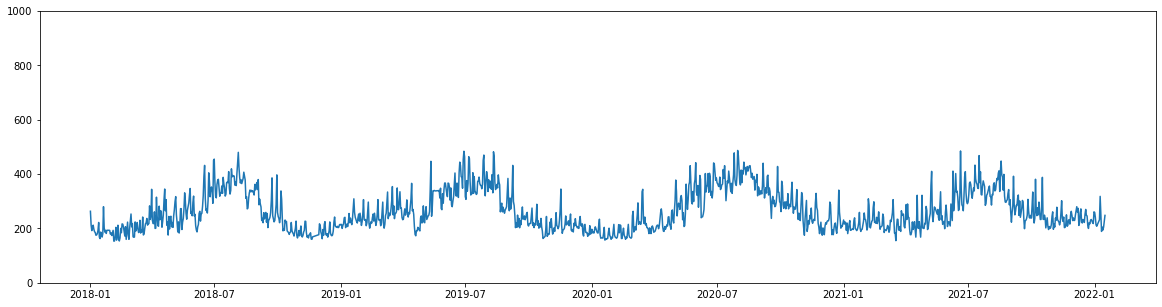

In [2]:
df = pd.read_csv(r'./consumo_diario_03.csv',parse_dates=["Fecha"], index_col=["Fecha"])
df.index = df.index.date
plt.figure(figsize=(20,5))
plt.plot(df['Consumo'])
plt.ylim([0,1000])

# Predicción con un modelo base ingenuo

In [3]:
# Realizaremos el test sobre el 20% de las ultimas muestras
test_index = df[(df.index>np.percentile(df.index, 79.9)) & (df.index<=np.percentile(df.index, 80.01))].index[0]


test=df[test_index:]
predicted=df[pd.Timestamp(test_index)- pd.offsets.DateOffset(days=1):].shift(1).dropna()
print(test.head())
print(predicted.head())

            Consumo
2021-03-27    252.0
2021-03-28    248.0
2021-03-29    253.0
2021-03-30    208.0
2021-03-31    202.0
            Consumo
2021-03-27    265.0
2021-03-28    252.0
2021-03-29    248.0
2021-03-30    253.0
2021-03-31    208.0


In [4]:
supporter.regression_results(supporter.scale(test),supporter.scale(predicted))

r2:  0.45
MAE:  0.1
MSE:  0.02
RMSE:  0.14
MAPE (%):  30.76


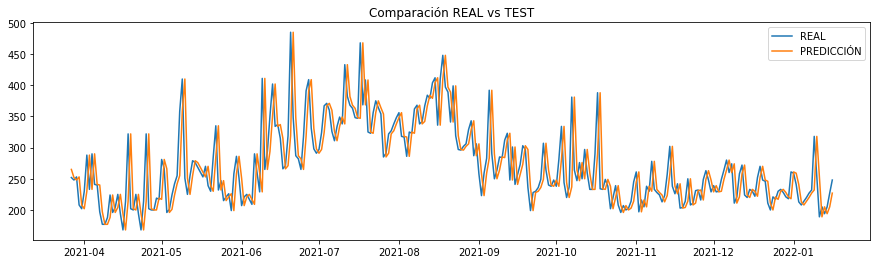

In [5]:
plt.rcParams["figure.figsize"] = (15,4)
plt.title('Comparación REAL vs TEST')
plt.plot(test, label='REAL')
plt.plot(predicted, label='PREDICCIÓN')
plt.legend()
plt.show()

# Descomposición de la serie temporal en sus componentes

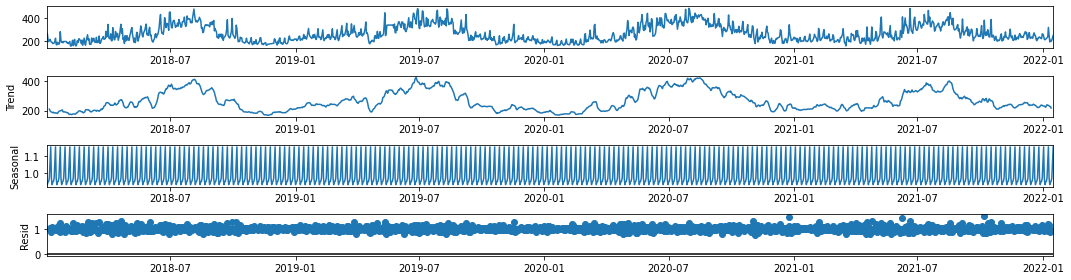

In [6]:
analysis = df[['Consumo']].copy()


decompose_result_mult = seasonal_decompose(analysis.asfreq('D'), model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

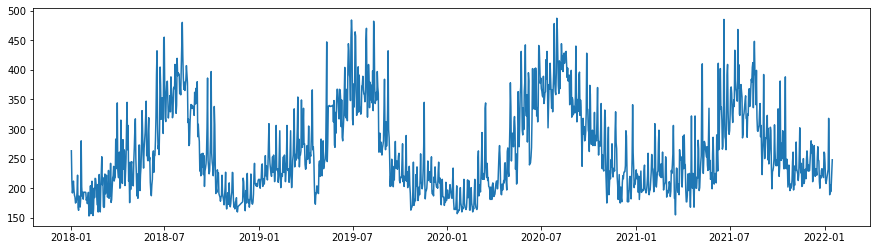

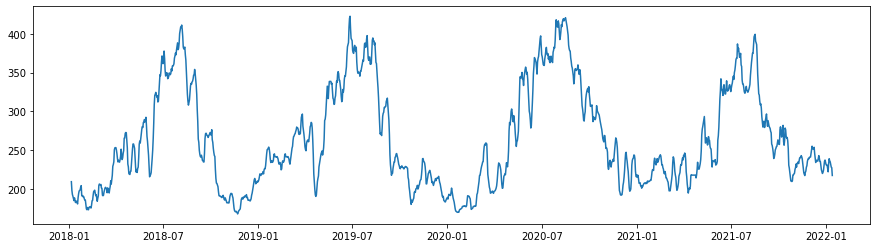

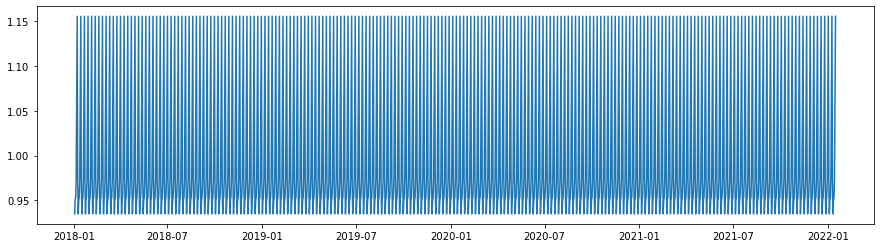

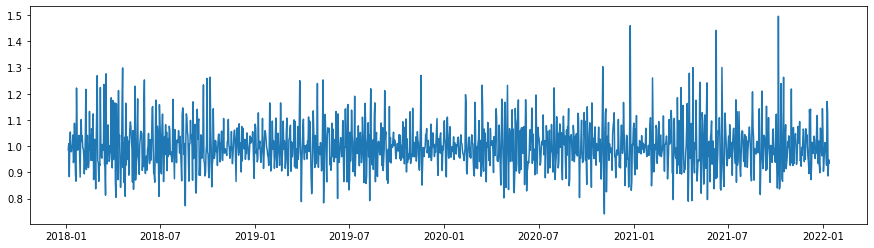

In [7]:
plt.figure()
plt.plot(df)
plt.figure()
plt.plot(trend)
plt.figure()
plt.plot(seasonal)
plt.figure()
plt.plot(residual)

### Observamos una estacionalidad de 7 días

2020-01-01    0.950206
2020-01-02    0.953596
2020-01-03    0.973685
2020-01-04    1.058970
2020-01-05    1.155799
2020-01-06    0.972947
2020-01-07    0.934797
2020-01-08    0.950206
2020-01-09    0.953596
2020-01-10    0.973685
2020-01-11    1.058970
2020-01-12    1.155799
2020-01-13    0.972947
2020-01-14    0.934797
2020-01-15    0.950206
2020-01-16    0.953596
2020-01-17    0.973685
2020-01-18    1.058970
2020-01-19    1.155799
2020-01-20    0.972947
2020-01-21    0.934797
2020-01-22    0.950206
2020-01-23    0.953596
2020-01-24    0.973685
2020-01-25    1.058970
2020-01-26    1.155799
2020-01-27    0.972947
2020-01-28    0.934797
Freq: D, Name: seasonal, dtype: float64


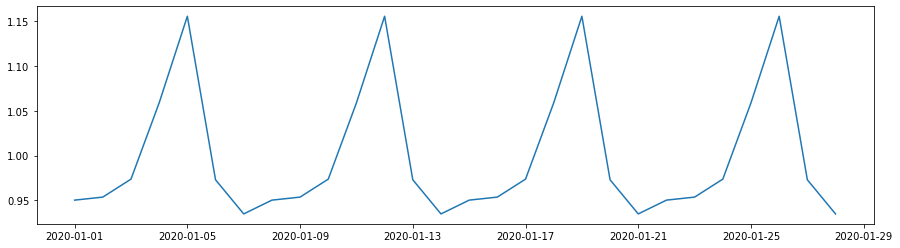

In [8]:
print(seasonal.loc["2020-01-01":"2020-01-28"])
plt.plot(seasonal.loc["2020-01-01":"2020-01-28"])

# Predicción con un modelo base ingenuo estacional

r2:  0.41
MAE:  0.11
MSE:  0.02
RMSE:  0.15
MAPE (%):  33.35


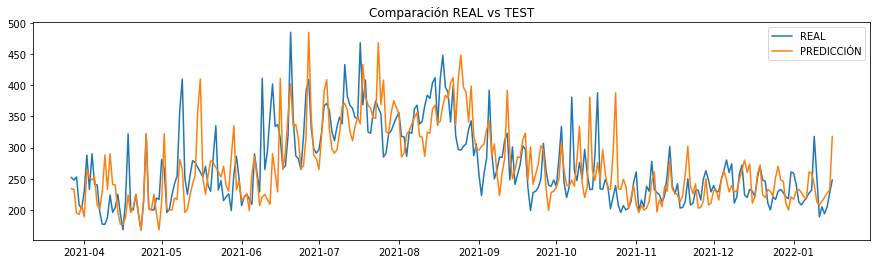

In [9]:
test=df[test_index:]
predicted=df[pd.Timestamp(test_index)- pd.offsets.DateOffset(days=7):].shift(7).dropna()
supporter.regression_results(supporter.scale(test),supporter.scale(predicted))
plt.title('Comparación REAL vs TEST')
plt.plot(test, label='REAL')
plt.plot(predicted, label='PREDICCIÓN')
plt.legend()
plt.show()

# Eliminamos el ruido de la serie temporal

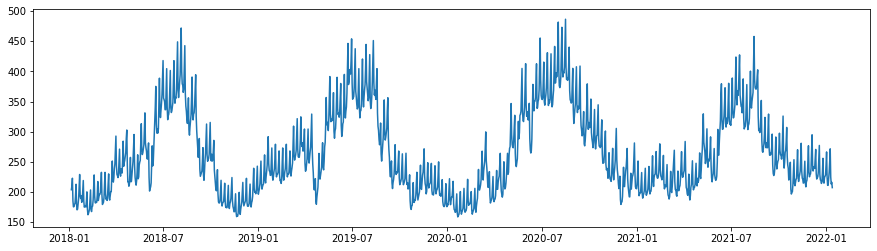

In [10]:
df_sinruido=(trend*seasonal).dropna().to_frame()
df_sinruido.index.name = 'Fecha'
df_sinruido.set_axis(['Consumo'], axis=1, inplace=True)
plt.plot(df_sinruido)

### Utilizamos los dos modelos ingenuos anteriores para predecir sobre la serie temporal sin ruido

r2:  0.79
MAE:  0.07
MSE:  0.01
RMSE:  0.09
MAPE (%):  21.74


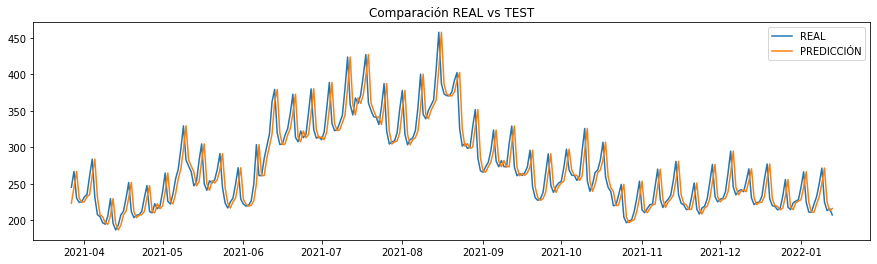

In [11]:
test=df_sinruido[test_index:]
predicted=df_sinruido[pd.Timestamp(test_index)- pd.offsets.DateOffset(days=1):].shift(1).dropna()
supporter.regression_results(supporter.scale(test),supporter.scale(predicted))
plt.title('Comparación REAL vs TEST')
plt.plot(test, label='REAL')
plt.plot(predicted, label='PREDICCIÓN')
plt.legend()
plt.show()

r2:  0.75
MAE:  0.08
MSE:  0.01
RMSE:  0.1
MAPE (%):  23.98


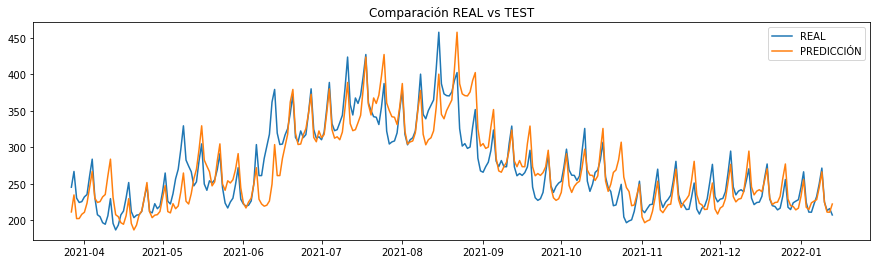

In [12]:
test=df_sinruido[test_index:]
predicted=df_sinruido[pd.Timestamp(test_index)- pd.offsets.DateOffset(days=7):].shift(7).dropna()
supporter.regression_results(supporter.scale(test),supporter.scale(predicted))
plt.title('Comparación REAL vs TEST')
plt.plot(test, label='REAL')
plt.plot(predicted, label='PREDICCIÓN')
plt.legend()
plt.show()

Como cabía esperar, los modelos mejoran considerablemente en la predicción cuando eliminamos el ruido de la serie temporal